In [31]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
#Read the data
df=pd.read_csv('fake_bills.csv',sep=";")

In [11]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [13]:
df.shape

(1500, 7)

In [15]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [19]:
#Missing values
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

<Figure size 640x480 with 0 Axes>

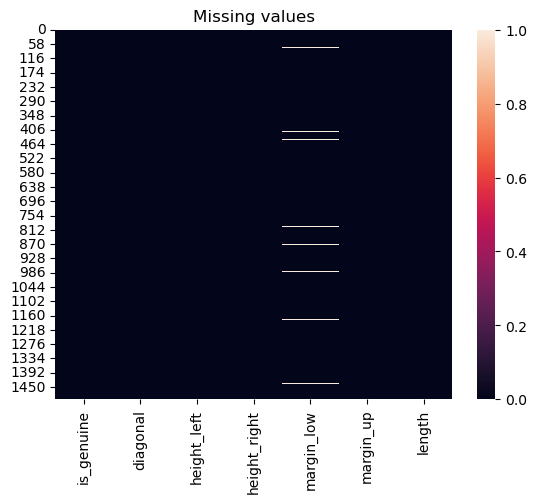

<Figure size 640x480 with 0 Axes>

In [21]:
sns.heatmap(df.isnull())
plt.title('Missing values')
plt.figure()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


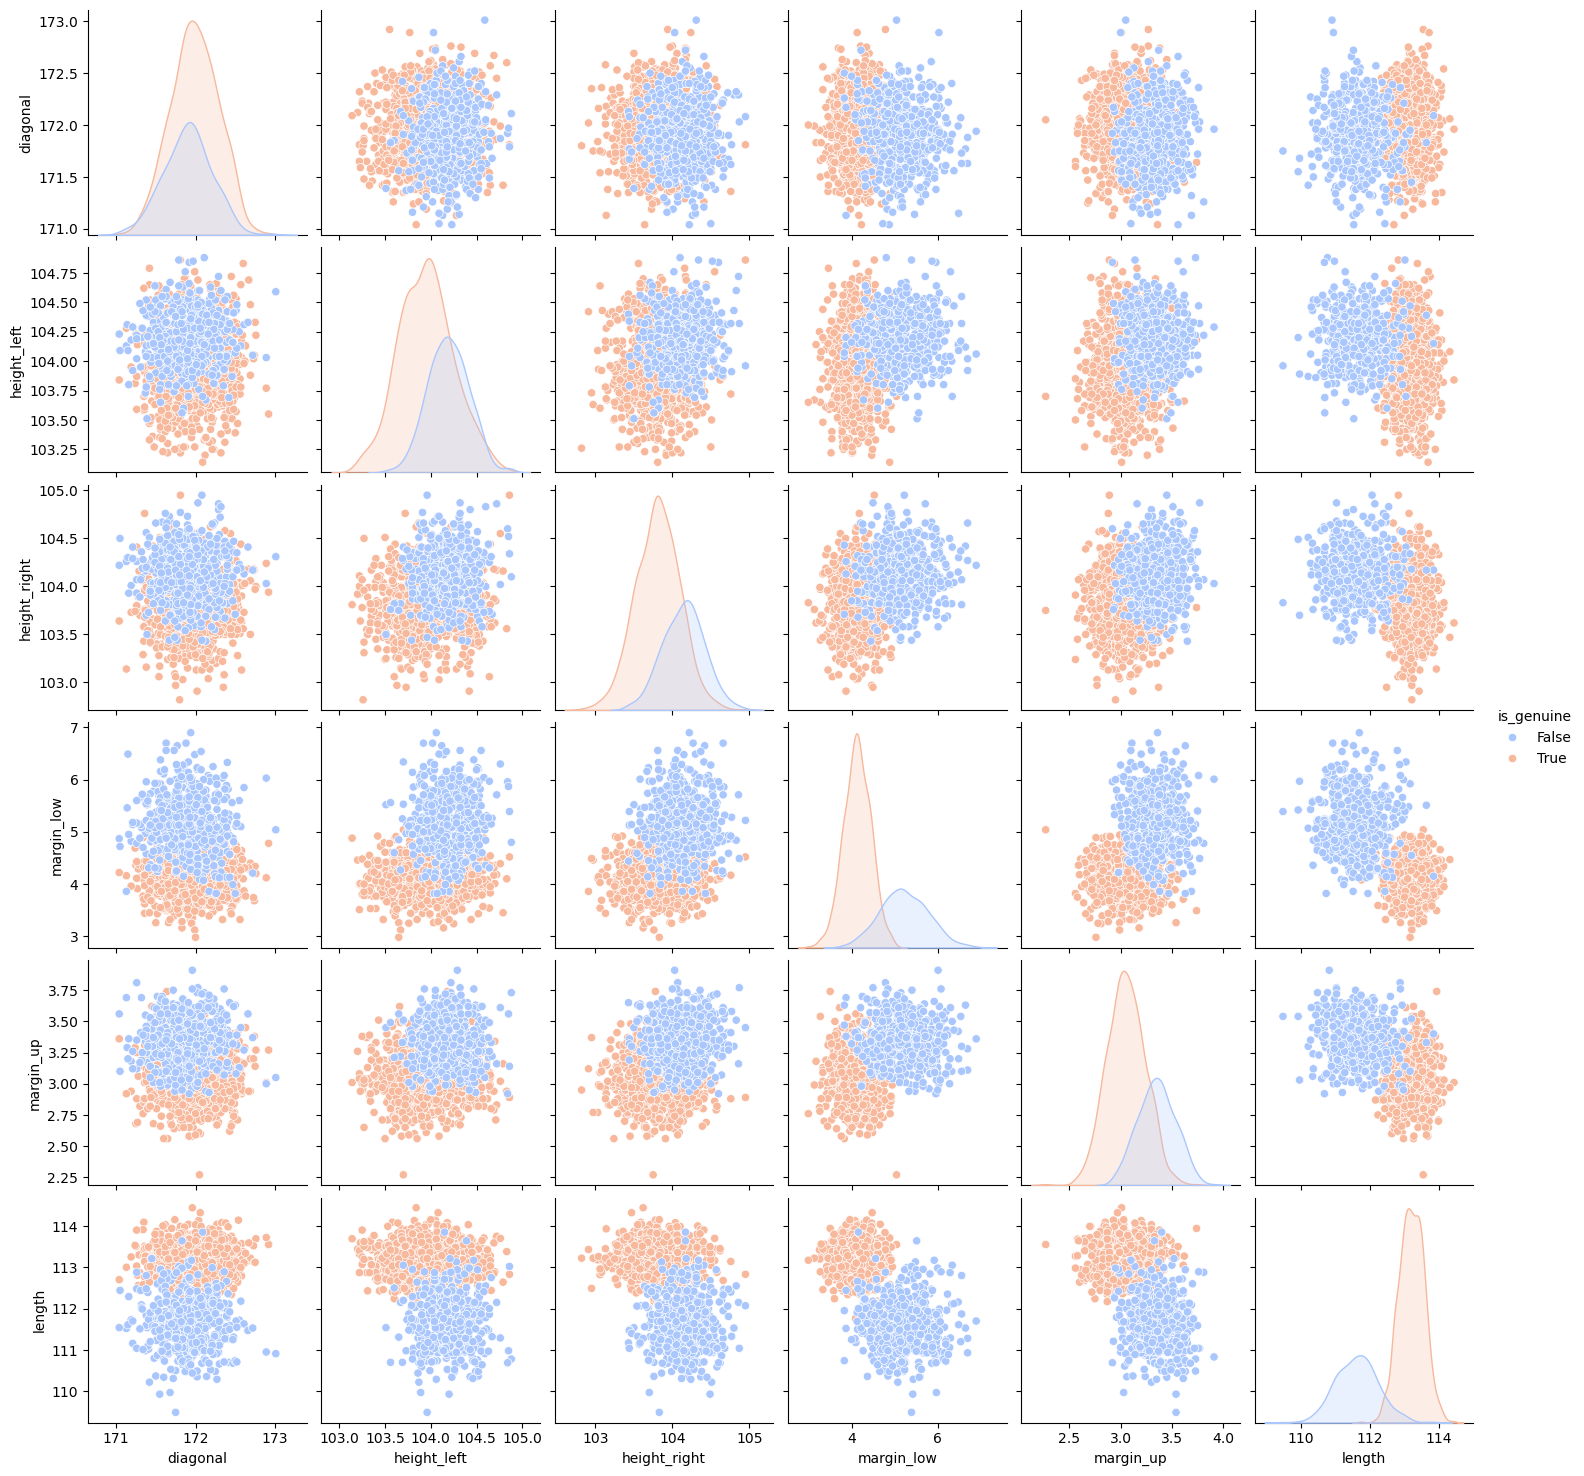

In [25]:
sns.pairplot(df, hue='is_genuine', palette= 'coolwarm')

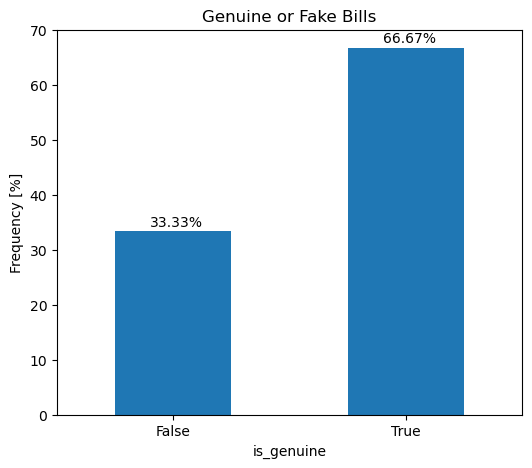

In [27]:
plt.figure(figsize=(6,5))
plt.title('Genuine or Fake Bills')
plt.xlabel('is_genuine')
plt.ylabel('Frequency [%]')

ax = (df.is_genuine.value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [32]:
imputer = SimpleImputer(strategy="mean")
data = imputer.fit_transform(df)


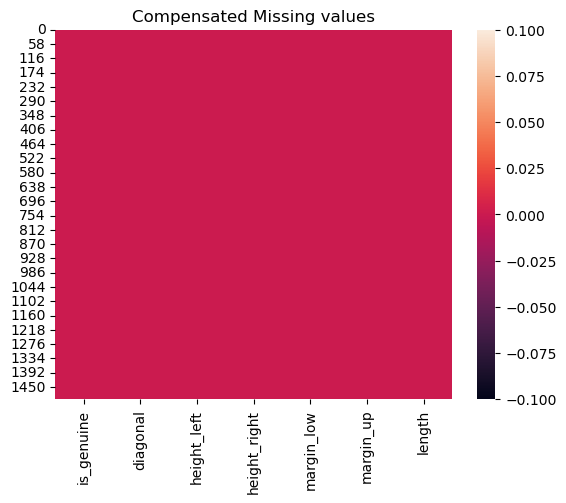

In [37]:
#Filling missing values
sns.heatmap(df.isnull())
plt.title('Compensated Missing values')
plt.show()

In [39]:
df.is_genuine.value_counts(normalize=True)

is_genuine
1.0    0.666667
0.0    0.333333
Name: proportion, dtype: float64

<Axes: xlabel='is_genuine', ylabel='count'>

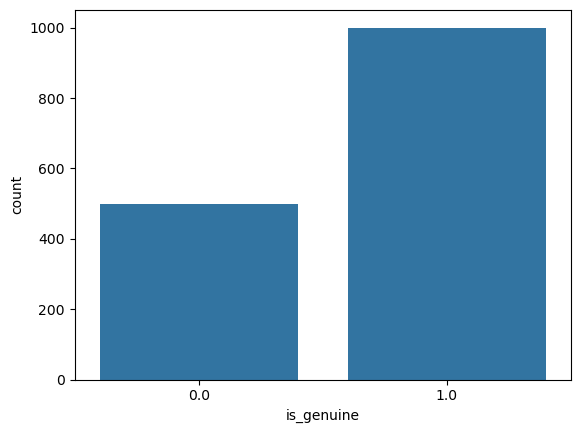

In [42]:
sns.countplot(data=df, x='is_genuine')

<Axes: >

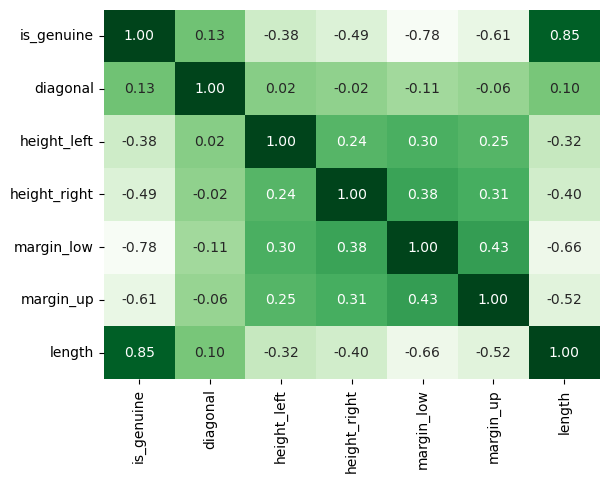

In [46]:
#Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cbar=None, cmap='Greens')

In [48]:
#Trainning set


X = df.drop(columns = 'is_genuine')
y = df['is_genuine']



In [50]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


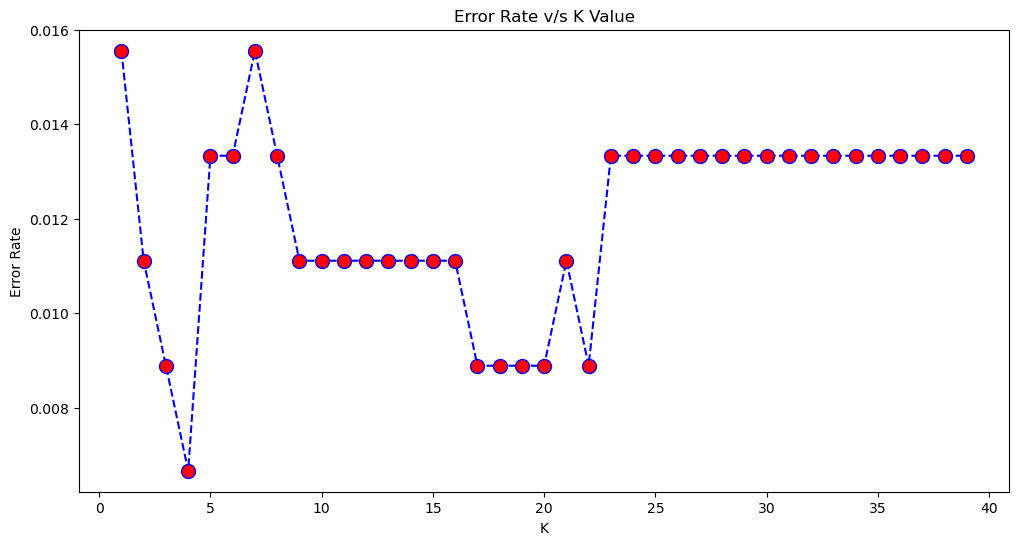

In [56]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize='10')
plt.title('Error Rate v/s K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [58]:


knn_4 = KNeighborsClassifier(n_neighbors = 4)
 
knn_4.fit(X_train, y_train)
pred = knn_4.predict(X_test)
 
print('WITH K = 4')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))
print('Accuracy Score')
print(accuracy_score(y_test, pred))



WITH K = 4
Confusion Matrix
[[159   2]
 [  1 288]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       161
         1.0       0.99      1.00      0.99       289

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

Accuracy Score
0.9933333333333333
